<a href="https://colab.research.google.com/github/bwinna/mini_project_World-why-wealth/blob/main/DADS5001_mid_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**All libraries for this project**

In [52]:
!pip install adjustText
import pandas as pd
import numpy as np
import re
import sys
import IPython
from IPython.display import display
import seaborn as sns
sns.set()  # Plot using the seaborn style
from scipy.stats import pearsonr
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import plotly.express as px
from adjustText import adjust_text
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.font_manager as fm


**Data sources**

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
df_life = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NIDA/DADS5001 Tool/mid project/Life-Expectancy-Data-Updated.csv')

df_happy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NIDA/DADS5001 Tool/mid project/World happiness report 2013-2024/World-happiness-report-updated_2024.csv')

df_birth_th = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/NIDA/DADS5001 Tool/mid project/thailand/Birth thailand.xlsx')

df_death_th = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/NIDA/DADS5001 Tool/mid project/thailand/death thailand.xlsx')

df_budg_th =  pd.read_excel('/content/drive/MyDrive/Colab Notebooks/NIDA/DADS5001 Tool/mid project/thailand/Budget_sector.xlsx')

df_pop_th =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NIDA/DADS5001 Tool/mid project/thailand/population 2002.csv')


**Data prepraration and clean**





***1.   Life expectency***


*   1.1.1  Overall average life expectency trend from 2003 to 20213
*   1.1.2  Add Thailand average life expectency from 2003 to 20213







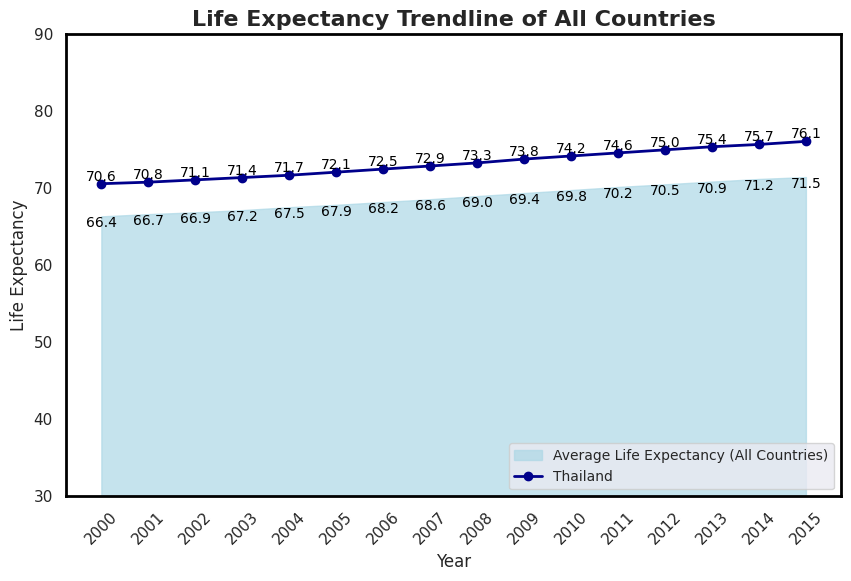

In [55]:
######################### AREA + LINE TREND #######################
df1=df_life[['Year','Life_expectancy','Region','Country']]
df1=df_life.groupby(['Year'])['Life_expectancy'].mean()
df_thailand = df_life[df_life['Country'] == 'Thailand'].groupby('Year')['Life_expectancy'].mean()

plt.figure(figsize=(10, 6), facecolor='white')

plt.fill_between(df1.index, df1.values, color='lightblue', alpha=0.7, label='Average Life Expectancy (All Countries)')

# Plot Thailand's life expectancy as a line plot
plt.plot(df_thailand.index, df_thailand.values, color='darkblue', marker='o', linestyle='-', linewidth=2, label='Thailand')

# Add key annotations for Thailand
for year, value in df_thailand.items():
    plt.text(year, value, f'{value:.1f}', ha='center', va='bottom', fontsize=10, color='black')

# Add key annotations for overall average life expectancy
for year, value in df1.items():
    plt.text(year, value, f'{value:.1f}', ha='center', va='top', fontsize=10, color='black')

# Add titles and labels
plt.title('Life Expectancy Trendline of All Countries', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)

# Set Y-axis limits
plt.ylim(30, 90)  # ตั้งขอบเขตของแกน Y

# Set x-ticks to match the years
plt.xticks(np.arange(2000, 2016, step=1), rotation=45)
plt.yticks(np.arange(30, 91, step=10))

# Add legend
plt.legend(loc='lower right', fontsize=10)

# Set the axis background color to white
ax = plt.gca()
ax.set_facecolor('white')  # Axis background color

# Draw a border around the figure
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set border color
    spine.set_linewidth(2)         # Set border width

plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

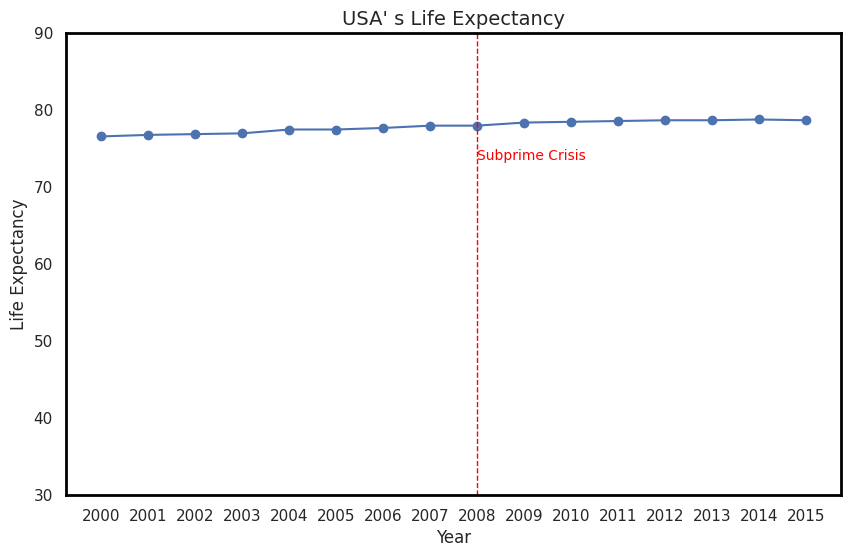

In [56]:
################################# LINE TREND USA ##############################
df1=df_life[['Year','Life_expectancy','Region','Country']]
df1 = df1[df1['Country'] == 'United States']
df1=df1.groupby(['Year'])['Life_expectancy'].mean()

plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(df1.index, df1.values, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title("USA' s Life Expectancy", fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.xticks(np.arange(2000,2016, step=1))
plt.yticks(np.arange(30,91, step=10))

# Set the axis background color to white
ax = plt.gca()
ax.set_facecolor('white')  # Axis background color

# Draw a border around the figure
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set border color
    spine.set_linewidth(2)         # Set border width

plt.axvline(x=2008, color='red', linestyle='--', linewidth=1)
plt.text(2008, 75, 'Subprime Crisis', color='red', ha='left', va='top', fontsize=10)

plt.show()

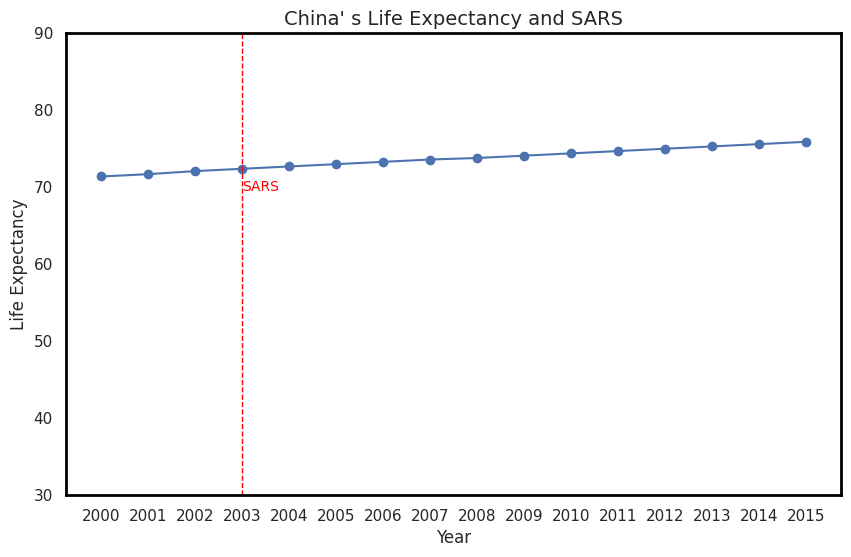

In [57]:
############################ LINE TREND China ##############################
df1=df_life[['Year','Life_expectancy','Region','Country']]
df1 = df1[df1['Country'] == 'China']
df1=df1.groupby(['Year'])['Life_expectancy'].mean()

plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(df1.index, df1.values, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title("China' s Life Expectancy and SARS", fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.xticks(np.arange(2000,2016, step=1))
plt.yticks(np.arange(30,91, step=10))
# Set the axis background color to white
ax = plt.gca()
ax.set_facecolor('white')  # Axis background color

# Draw a border around the figure
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set border color
    spine.set_linewidth(2)         # Set border width

plt.axvline(x=2003, color='red', linestyle='--', linewidth=1)
plt.text(2003, 71, 'SARS', color='red', ha='left', va='top', fontsize=10)

plt.show()

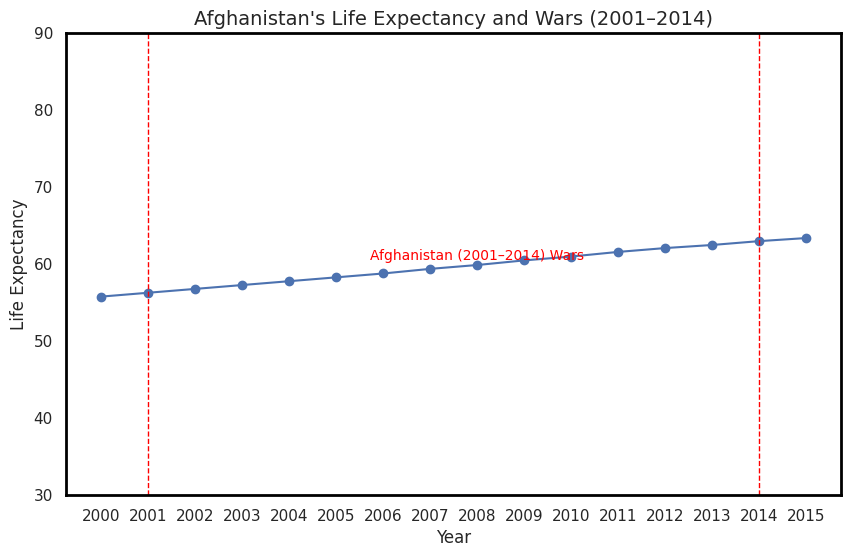

In [58]:
########################## LINE TREND Afghanistan ##############################
df1=df_life[['Year','Life_expectancy','Region','Country']]
df1 = df1[df1['Country'] == 'Afghanistan']
df1=df1.groupby(['Year'])['Life_expectancy'].mean()

plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(df1.index, df1.values, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title("Afghanistan's Life Expectancy and Wars (2001–2014)", fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.xticks(np.arange(2000,2016, step=1))
plt.yticks(np.arange(30,91, step=10))

# Set the axis background color to white
ax = plt.gca()
ax.set_facecolor('white')  # Axis background color

# Draw a border around the figure
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set border color
    spine.set_linewidth(2)         # Set border width

plt.axvline(x=2001, color='red', linestyle='--', linewidth=1)
plt.axvline(x=2014, color='red', linestyle='--', linewidth=1)
plt.text(2008, 62, 'Afghanistan (2001–2014) Wars', color='red', ha='center', va='top', fontsize=10)


plt.show()



*   1.2 กราฟ Trend by region (note scale แกน x, y ต้องเท่ากัน ทุกกราฟ)
      ศรแดง = % การเปลี่ยนแปลง = (หลัง - ก่อน) / ก่อน





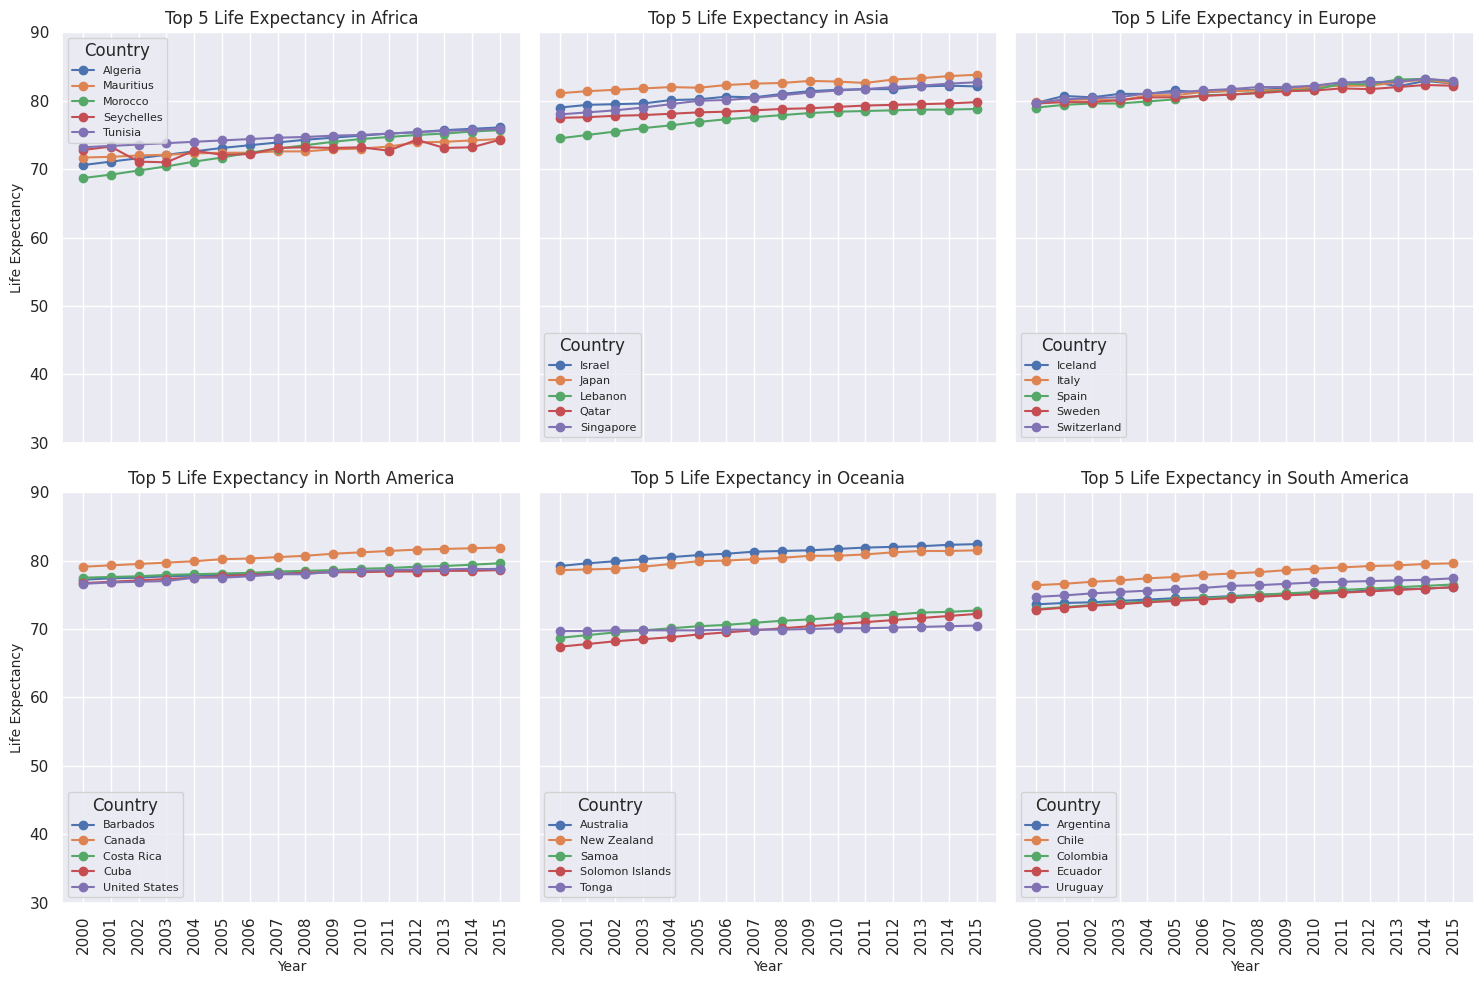

In [59]:
#################### Top 5 countries per regions ###########################
df2 = df_life[['Year', 'Life_expectancy', 'Region', 'Country']]
df2.loc[(df2['Region'] == 'European Union') | (df2['Region'] == 'Rest of Europe'), 'Region'] = 'Europe'
df2.loc[(df2['Region'] == 'Middle East'), 'Region'] = 'Asia'
df2.loc[(df2['Region'] == 'Central America and Caribbean'), 'Region'] = 'North America'

# ฟังก์ชันหา Top 5 ประเทศที่มีค่าเฉลี่ย Life Expectancy สูงสุดในแต่ละภูมิภาค
def get_top5_countries_by_region(region_data):
    # หาเฉลี่ยของ Life Expectancy ต่อประเทศ
    avg_life_expectancy = region_data.groupby('Country')['Life_expectancy'].mean()
    # เลือก Top 5 ประเทศที่มีค่า Life Expectancy สูงสุด
    top5_countries = avg_life_expectancy.nlargest(5).index
    return region_data[region_data['Country'].isin(top5_countries)]

regions = df2['Region'].sort_values().unique()

# กำหนดขนาดและ layout ของ subplot
n_rows = (len(regions) + 2) // 3  # จำนวนแถวของ subplot
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows), sharex=True, sharey=True)

# Flatten axes สำหรับใช้กับการทำ loop
axes = axes.flatten()

# loop แต่ละภูมิภาคและสร้างกราฟ
for i, region in enumerate(regions):
    ax = axes[i]

    # เลือกข้อมูลเฉพาะของภูมิภาคนี้
    region_data = df2[df2['Region'] == region]

    # เลือกเฉพาะ Top 5 ประเทศที่มีค่า Life Expectancy เฉลี่ยสูงสุดในภูมิภาคนี้
    top5_data = get_top5_countries_by_region(region_data)

    # หาเฉลี่ย Life Expectancy ของ Top 5 ประเทศในแต่ละปี
    top5_avg = top5_data.groupby(['Year', 'Country'])['Life_expectancy'].mean().unstack()

    # Plot line graph สำหรับค่าเฉลี่ย Life Expectancy ของ Top 5 ประเทศในภูมิภาคนี้
    top5_avg.plot(ax=ax, marker='o', linestyle='-')

    # ตั้งค่า title และ legend
    ax.set_title(f'Top 5 Life Expectancy in {region}', fontsize=12)
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Life Expectancy', fontsize=10)
    ax.legend(title='Country', fontsize=8)

    # ตั้งค่า y scale ให้เริ่มจาก 30 ถึง 90
    ax.set_ylim(30, 90)  # เพิ่มบรรทัดนี้เพื่อกำหนดช่วงของแกน Y

    # ตั้งค่าช่วงของค่าบนแกน X และหมุนข้อความแกน X ให้เป็นแนวตั้ง
    ax.set_xticks(np.arange(2000, 2016, step=1))
    ax.tick_params(axis='x', rotation=90)

# ตั้งค่าให้ไม่แสดง subplot ที่ว่าง
for i in range(len(regions), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()


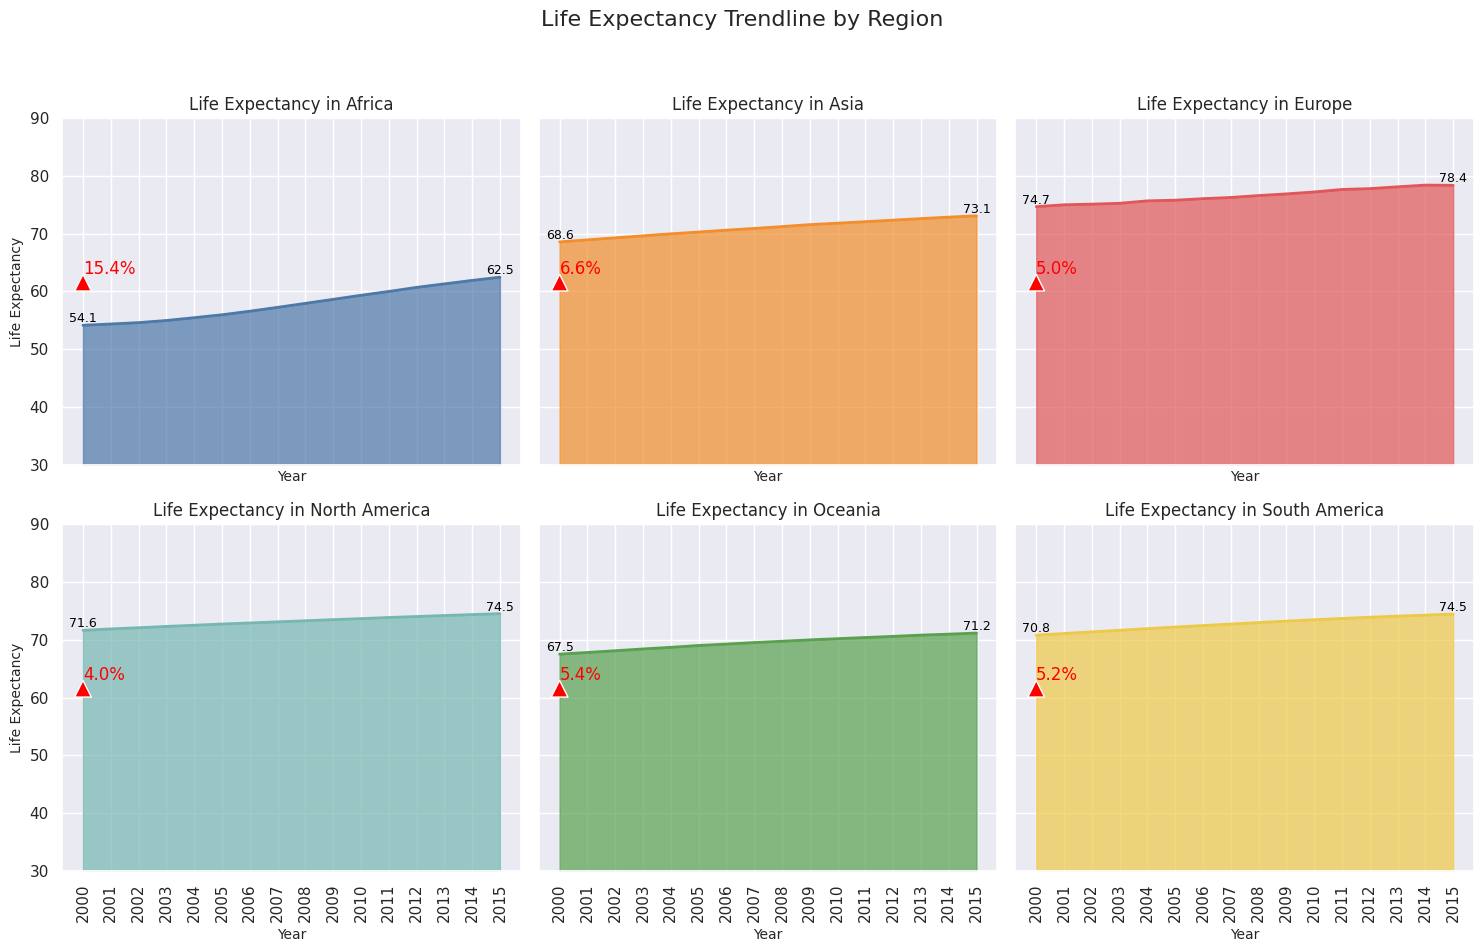

In [60]:
######################### Trend by region ####################################
df2['Year'] = pd.to_numeric(df2['Year'], errors='coerce')
df2['Life_expectancy'] = pd.to_numeric(df2['Life_expectancy'], errors='coerce')

df2 = df2.dropna(subset=['Year', 'Life_expectancy'])

avg_life_by_region = df2.groupby(['Year', 'Region'])['Life_expectancy'].mean().reset_index()

regions = avg_life_by_region['Region'].unique()
colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f', '#edc948']

#create subplot
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Life Expectancy Trendline by Region', fontsize=16)

for i, region in enumerate(regions):
    ax = axes[i // 3, i % 3]  # Access subplot by row/column index

    # Filter data for the current region
    region_data = avg_life_by_region[avg_life_by_region['Region'] == region]

    # Plot the area chart for each region
    ax.fill_between(region_data['Year'], region_data['Life_expectancy'], color=colors[i], alpha=0.7, label=region)
    ax.plot(region_data['Year'], region_data['Life_expectancy'], color=colors[i], linewidth=2)

    # Add annotations (first and last points)
    first_value = region_data['Life_expectancy'].iloc[0]
    last_value = region_data['Life_expectancy'].iloc[-1]
    percentage_change = ((last_value - first_value) / first_value) * 100

    ax.text(region_data['Year'].min(), first_value, f"{first_value:.1f}",
            ha='center', va='bottom', fontsize=9, color='black')
    ax.text(region_data['Year'].max(), last_value, f"{last_value:.1f}",
            ha='center', va='bottom', fontsize=9, color='black')

    # Add red arrow with percentage change (top-left corner)
    ax.annotate(f'{percentage_change:.1f}%', xy=(2000, 63),
                xytext=(2000, 63),
                arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')

    # Set title for each subplot
    ax.set_title(f'Life Expectancy in {region}', fontsize=12)

    # Show the y-label only for the first plot in each row
    if i % 3 != 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('Life Expectancy', fontsize=10)

    ax.set_xlabel('Year', fontsize=10)

    # ตั้งค่าช่วงของค่าบนแกน X และหมุนข้อความแกน X ให้เป็นแนวตั้ง
    ax.set_xticks(np.arange(2000, 2016, step=1))
    ax.set_yticks(np.arange(30, 91, step=10))
    ax.set_ylim(30, 90)
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()



*   1.3 กราฟ Trend by developing/ develop (note scale แกน x, y ต้องเท่ากัน)









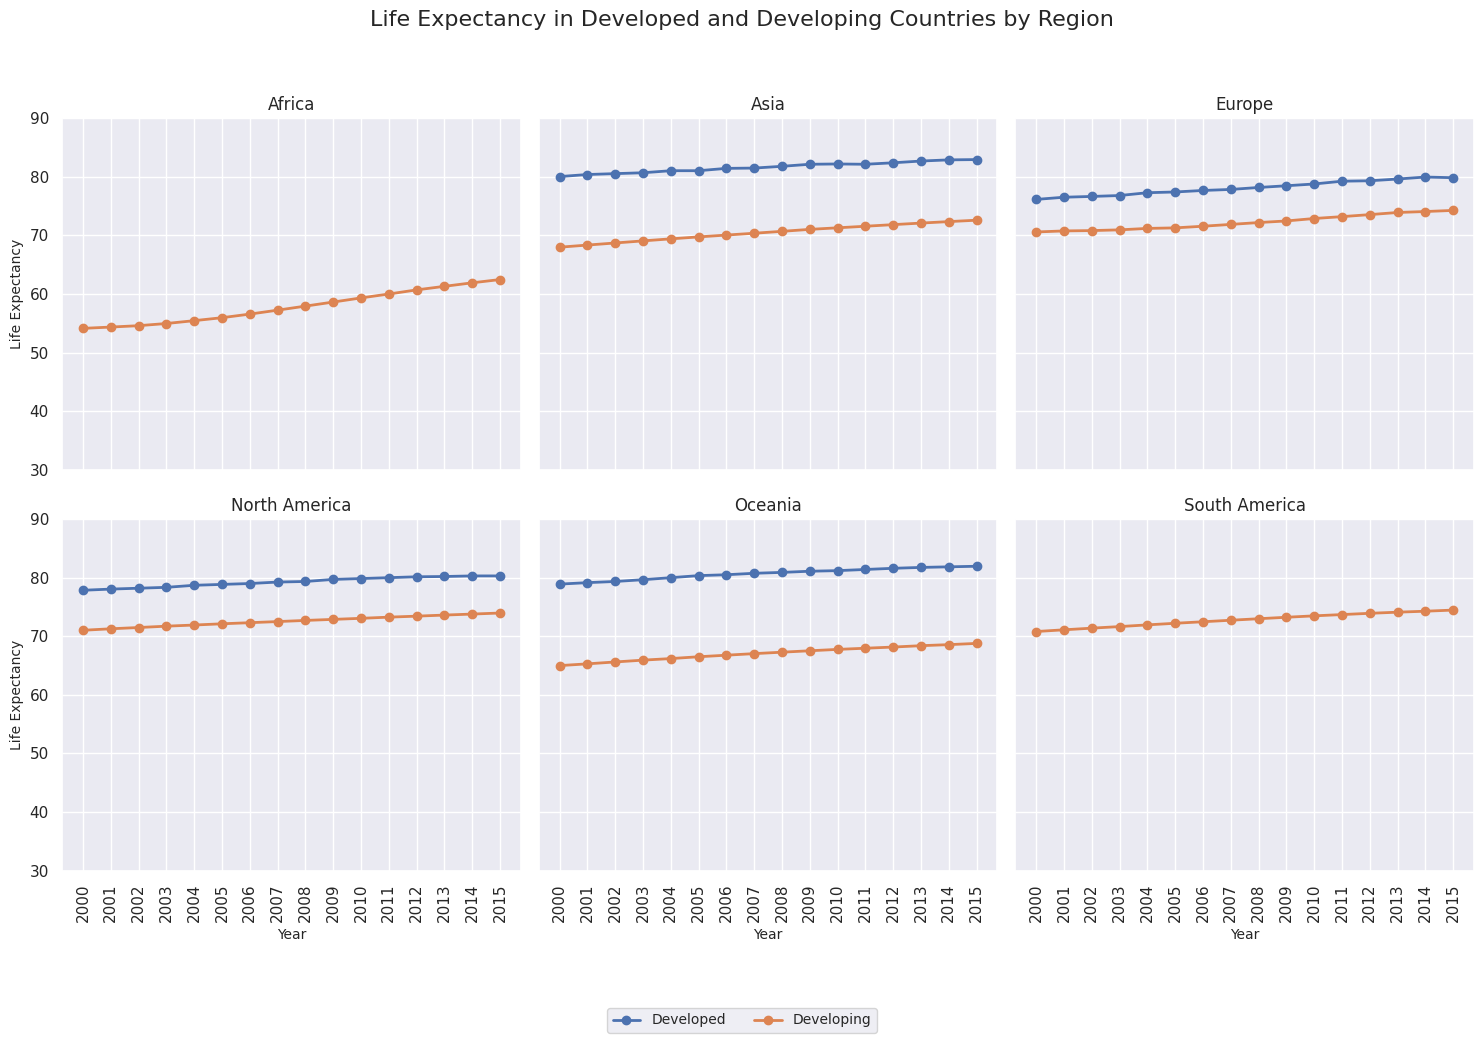

In [61]:
df3 = df_life[['Year', 'Life_expectancy', 'Economy_status_Developed', 'Economy_status_Developing', 'Region']]

df3['Economy_status'] = df3['Economy_status_Developed'].map({0: 'Developing', 1: 'Developed'})

df3.loc[df3['Region'].isin(['European Union', 'Rest of Europe']), 'Region'] = 'Europe'
df3.loc[df3['Region'] == 'Middle East', 'Region'] = 'Asia'
df3.loc[df3['Region'] == 'Central America and Caribbean', 'Region'] = 'North America'

avg_life_by_region_status = df3.groupby(['Year', 'Region', 'Economy_status'])['Life_expectancy'].mean().reset_index()

regions = avg_life_by_region_status['Region'].unique()
statuses = ['Developed', 'Developing']

# Create subplots (2 rows, 3 columns) with shared x and y axes
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Life Expectancy in Developed and Developing Countries by Region', fontsize=16)

# Define the same y-axis and x-axis limits for consistency
y_min, y_max = 30, 90
x_min, x_max = avg_life_by_region_status['Year'].min(), avg_life_by_region_status['Year'].max()

# Loop through regions and plot each one in a respective subplot
for i, region in enumerate(regions):
    ax = axes[i // 3, i % 3]  # Access subplot by row/column index

    # Filter data for the current region
    region_data = avg_life_by_region_status[avg_life_by_region_status['Region'] == region]

    # Plot both Developed and Developing statuses within the same region subplot
    for status in statuses:
        status_data = region_data[region_data['Economy_status'] == status]
        ax.plot(status_data['Year'], status_data['Life_expectancy'], marker='o', linestyle='-',label=status, linewidth=2)

    # Set title for each subplot
    ax.set_title(f'{region}', fontsize=12)

    # Show the y-label only for the first column
    if i % 3 != 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('Life Expectancy', fontsize=10)

    # Set x-label for the last row only
    if i < 3:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Year', fontsize=10)

 # ตั้งค่าช่วงของค่าบนแกน X และหมุนข้อความแกน X ให้เป็นแนวตั้ง
    ax.set_xticks(np.arange(2000, 2016, step=1))
    ax.set_yticks(np.arange(30, 91, step=10))
    ax.set_ylim(30, 90)
    ax.tick_params(axis='x', rotation=90)

fig.legend(labels=['Developed', 'Developing'], loc='lower center', ncol=2, fontsize=10, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

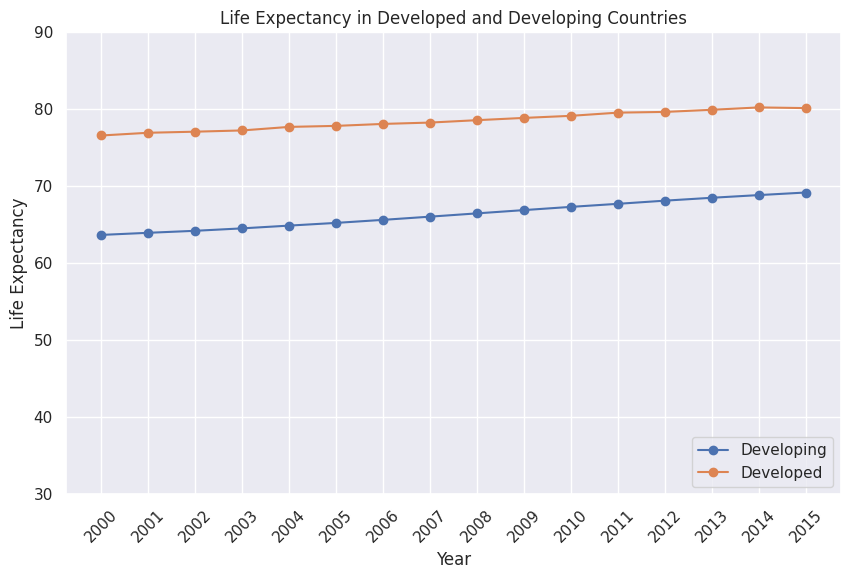

In [62]:
df3 = df_life[['Year', 'Life_expectancy', 'Economy_status_Developed', 'Economy_status_Developing']]

df3['Economy_status'] = df3['Economy_status_Developed'].map({0: 'Developing', 1: 'Developed'})

avg_life_by_region_status = df3.groupby(['Year', 'Economy_status'])['Life_expectancy'].mean().reset_index()

plt.figure(figsize=(10, 6))

for status in ['Developing', 'Developed']:
    subset = avg_life_by_region_status[avg_life_by_region_status['Economy_status'] == status]
    plt.plot(subset['Year'], subset['Life_expectancy'], label=status, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy in Developed and Developing Countries')
plt.legend(loc='lower right')

# Set x-ticks to match the years
plt.xticks(np.arange(2000, 2016, step=1), rotation=45)
plt.yticks(np.arange(30,91, step=10))

plt.show()

*   1.4 ประเทศที่อายุยืนเป็นอย่างไร




*   1.4.1	 line grap นอน top10 color green other color = grey
    
    ทำสีที่ประเทศไทย
    
     x = average life 5 year ล่าสุด

     y = country sort by max to min

     ใส่เส้น avg all country พาด ไปด้วย


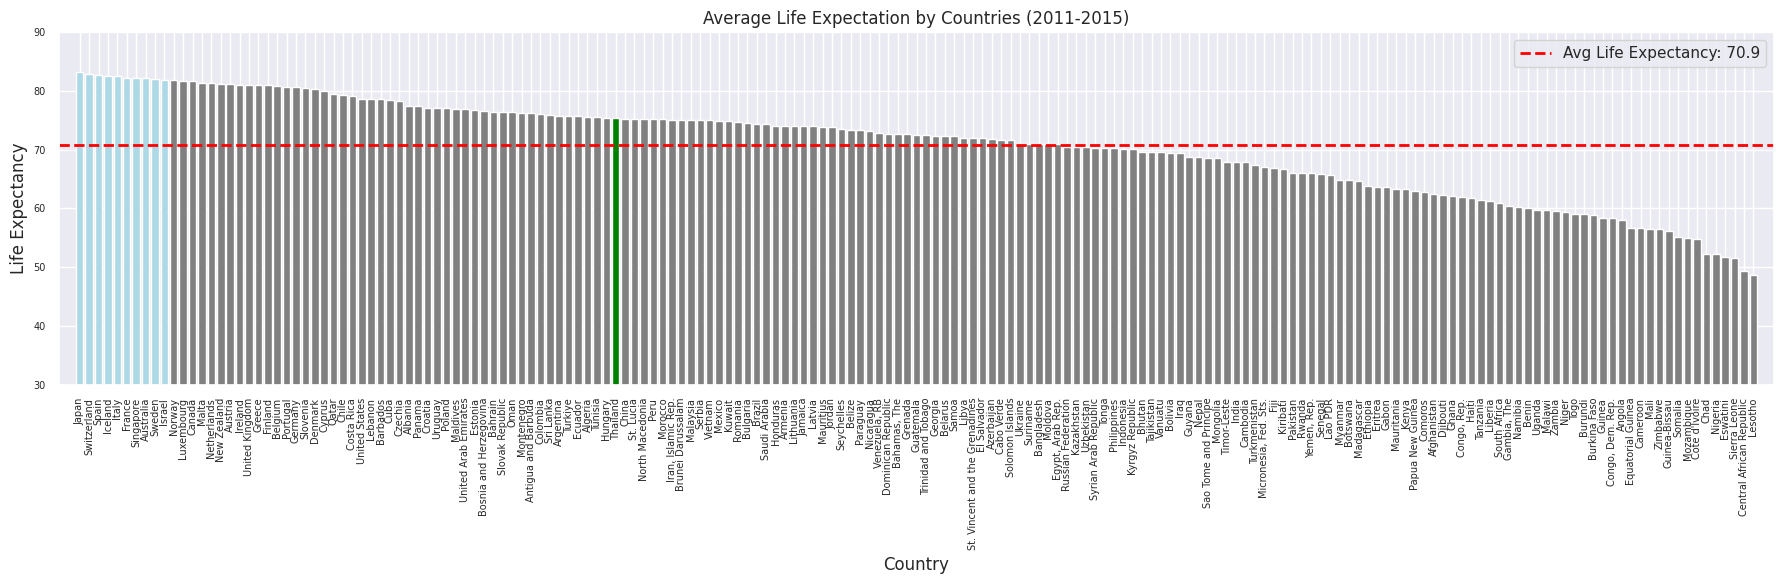

In [63]:
df4 = df_life[['Year','Life_expectancy', 'Country']]
df4 = df4[df4['Year']>2010]
df4 = df4.groupby(['Country'])['Life_expectancy'].mean().reset_index()
df4 = df4.sort_values(by='Life_expectancy', ascending=False)

# Sort by life expectancy in descending order and add a rank column
df4 = df4.sort_values(by='Life_expectancy', ascending=False)
df4['Rank'] = range(1, len(df4) + 1)

# Calculate the global average life expectancy for years > 2010
avg_life_expectancy = df4['Life_expectancy'].mean()

plt.figure(figsize=(18, 6))

# Set bar color: green for Thailand, skyblue for top 10, gray for others
colors = ['green' if country == 'Thailand'
          else 'lightblue' if rank <= 10
          else 'gray'
          for country, rank in zip(df4['Country'], df4['Rank'])]

# Plot the bars
bar_width = 1.2  # Adjust this value to increase the bar width
plt.bar(df4['Country'], df4['Life_expectancy'], color=colors)

# Add a horizontal line for the global average life expectancy
plt.axhline(y=avg_life_expectancy, color='red', linestyle='--', linewidth=2,
            label=f'Avg Life Expectancy: {avg_life_expectancy:.1f}')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Average Life Expectation by Countries (2011-2015)')

# Set y-ticks from 30 to 90
plt.yticks(np.arange(30, 91, step=10), fontsize=7)
plt.xticks(fontsize=7, rotation=90)
plt.ylim(30, 90)

# Add legend
plt.legend()

plt.margins(x=0.01)  # Adjust x margin to be closer to the xticks

plt.tight_layout()
plt.show()

In [64]:
df4[df4['Country']=='Thailand']

,Country,Life_expectancy,Rank
158,Thailand,75.36,58




*   1.4.2	 trend grap ของแต่ละ feature เฉลี่ยเฉพาะ  (4 เส้น)

    top 10 เส้นใหญ่ๆ สีเดียวกันทุกอัน

    btm 10 เส้นใหญ่ๆ

    line thailand  สีอ่อนๆ ลายประ

    line average all country  สีอ่อนๆ สีอื่น
    
    x = year y = amount





*   1.4.3	 heatmap column เอาแต่ละ feature มาหา correlation กับ life แต่เอาแค่ 1 column ,average all country

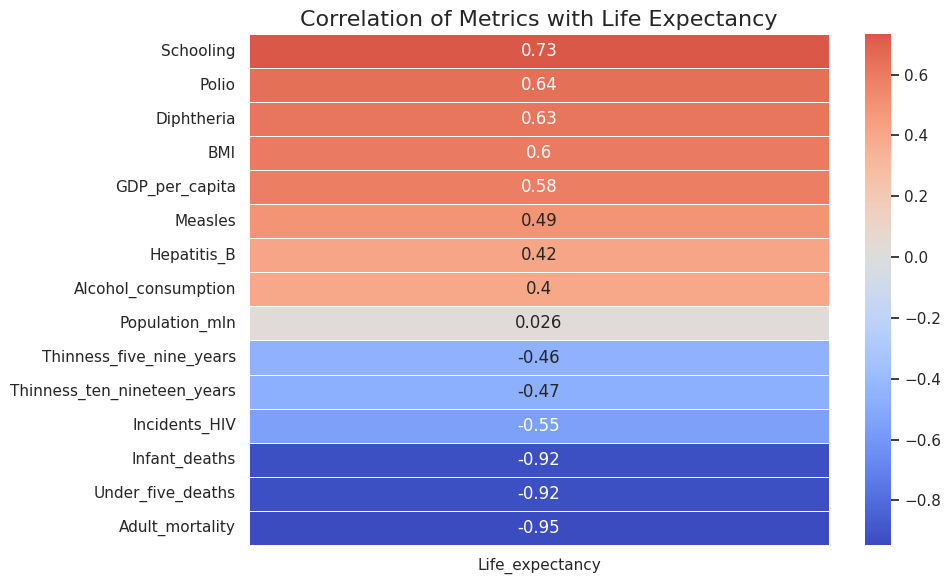

In [65]:
df5 = df_life[['Life_expectancy', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality','Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln',
'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling']]

# Calculate the correlation matrix with respect to 'Life_expectancy'
correlation_matrix = df5.corr()[['Life_expectancy']].drop('Life_expectancy').sort_values(by='Life_expectancy', ascending=False)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Add titles and labels
plt.title('Correlation of Metrics with Life Expectancy', fontsize=16)

plt.tight_layout()

plt.show()

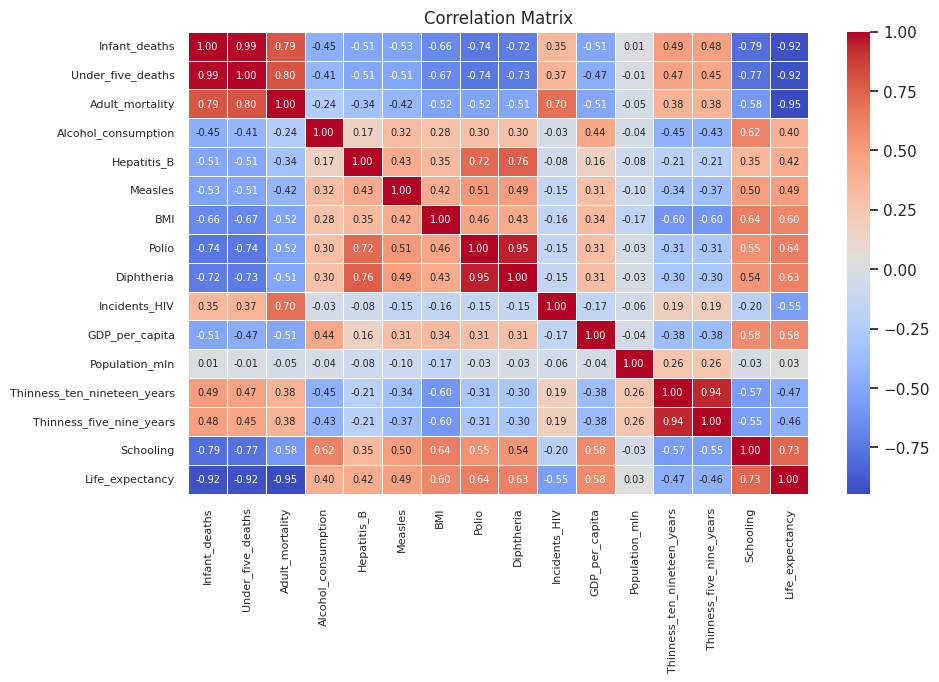

In [66]:
data_numeric = df_life.drop(['Country', 'Region','Year','Economy_status_Developed','Economy_status_Developing'], axis=1)

# Creating the correlation matrix
correlation_matrix = data_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 7})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Correlation Matrix')
plt.show()

**Part 3 Happiness**


*   3.1 factor
    *   3.1.1 corr column ,feature (all) to target (happy)






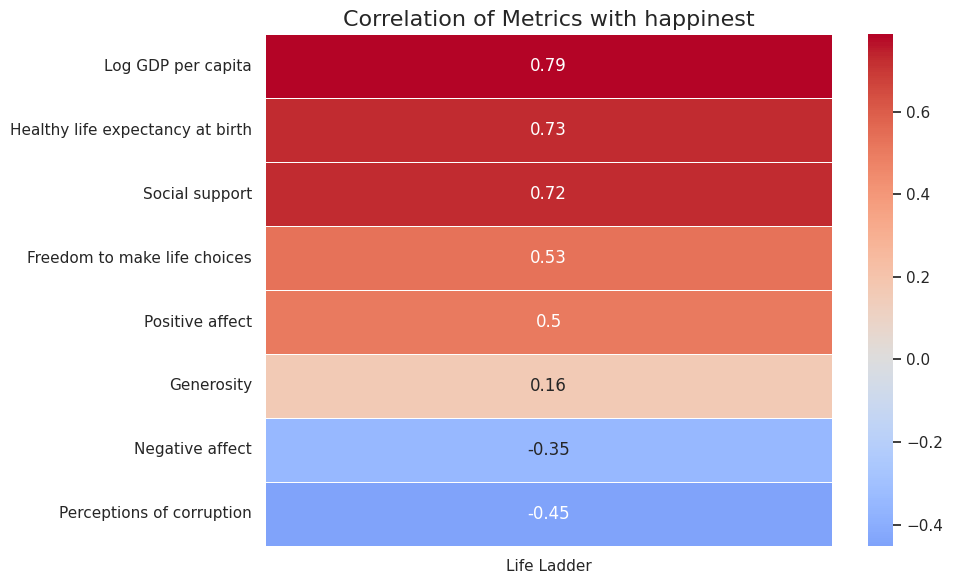

In [67]:
df31 = df_happy[['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect']]

df_happy.head()

df31=df31.dropna()

# Calculate the correlation matrix with respect to 'Life_expectancy'
correlation_matrix = df31.corr()[['Life Ladder']].drop('Life Ladder').sort_values(by='Life Ladder', ascending=False)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

plt.title('Correlation of Metrics with happinest', fontsize=16)

plt.tight_layout()
plt.show()

*   3.2 correlation between life and happiness ( 5 ปี )
    *   3.2.1 corr matrix (join life and happy)


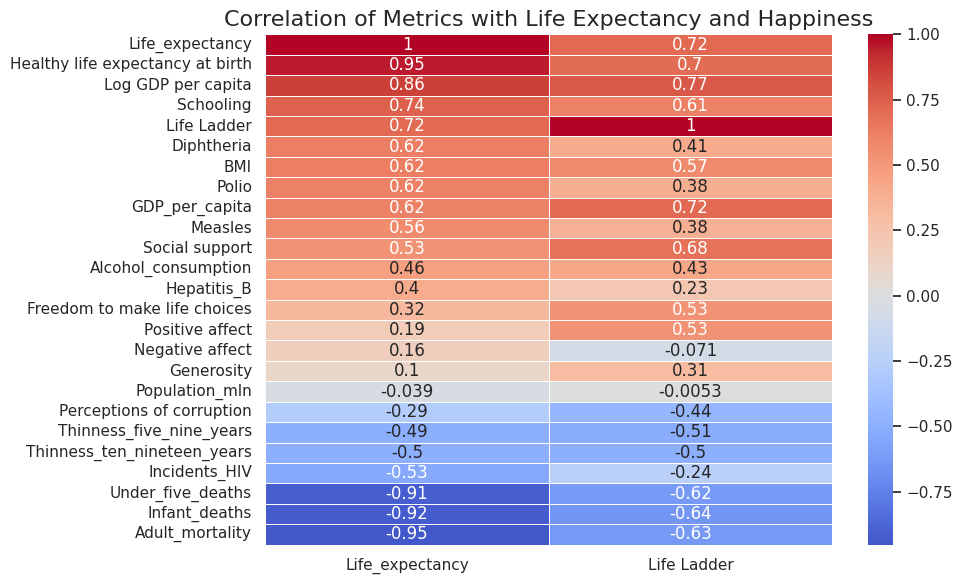

In [68]:
df32 = df_life
df33 = df_happy
df34 = pd.merge(df32, df33, left_on=['Year', 'Country'], right_on=['year', 'Country name'])
df34 = df34.drop(['year', 'Country name'], axis=1)
df34.isnull().sum()
df34 = df34.dropna()

# Filter the data between 2008 and 2013
df34 = df34[(df34['Year'] > 2008) & (df34['Year'] < 2013)]

# Select the relevant columns for correlation analysis
df34 = df34[['Life_expectancy', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
             'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
             'Population_mln', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling', 'Life Ladder',
             'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices',
             'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']]

# Calculate the correlation matrix (including Life_expectancy and Life Ladder)
correlation_matrix = df34.corr()[['Life_expectancy', 'Life Ladder']].sort_values(by='Life_expectancy', ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

plt.title('Correlation of Metrics with Life Expectancy and Happiness', fontsize=16)

plt.tight_layout()
plt.show()


 *   3.2.2 scatter plot (x = happy) (y = life)  with line

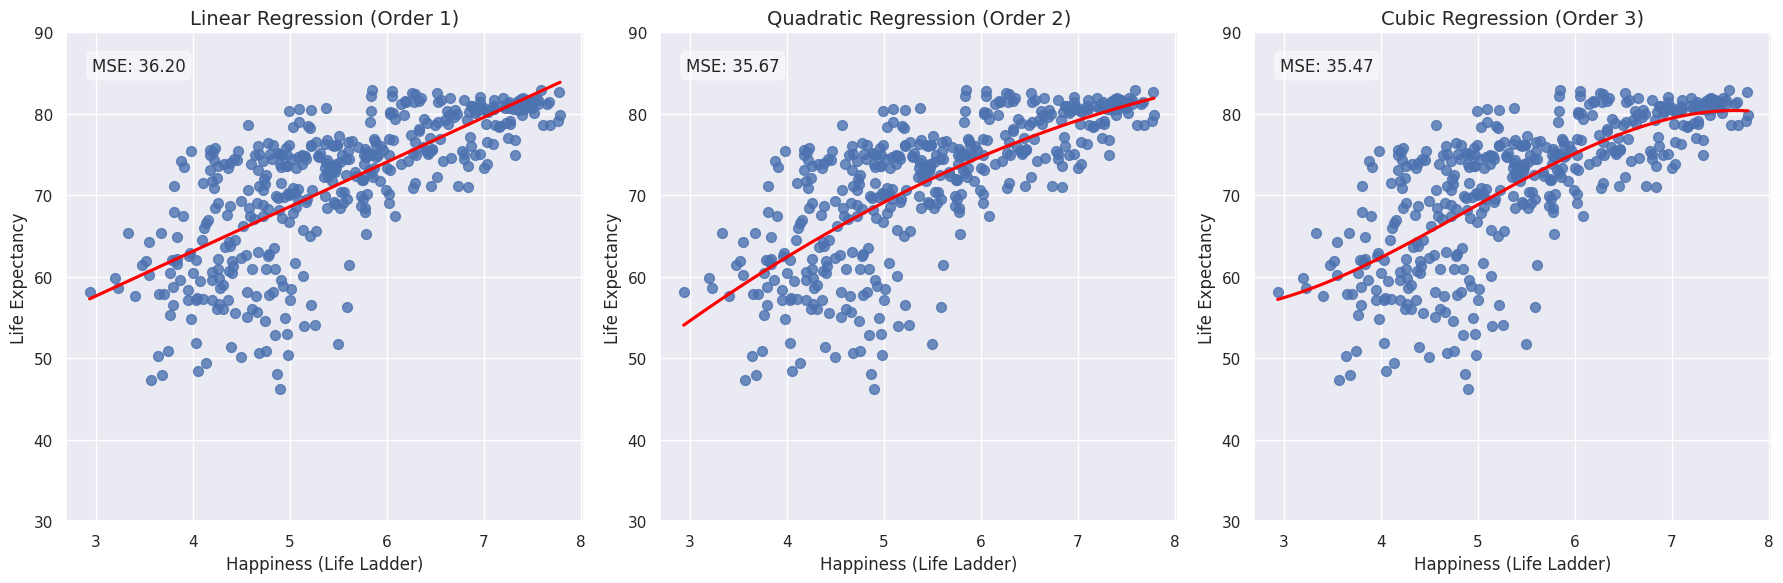

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 แถว 3 คอลัมน์

# Define X and y
X = df34['Life Ladder']
y = df34['Life_expectancy']

# Scatter plot with linear regression line (order=1)
sns.regplot(data=df34, x='Life Ladder', y='Life_expectancy', ci=None,
            scatter_kws={'s': 50}, line_kws={'color': 'red'}, ax=axes[0], order=1)
# Calculate MSE for linear regression (order=1)
p1 = np.polyfit(X, y, 1)  # Fit a 1st degree polynomial
y_pred1 = np.polyval(p1, X)
mse1 = mean_squared_error(y, y_pred1)
axes[0].set_title('Linear Regression (Order 1)', fontsize=14)
axes[0].set_xlabel('Happiness (Life Ladder)', fontsize=12)
axes[0].set_ylabel('Life Expectancy', fontsize=12)
axes[0].set_yticks(np.arange(30, 91, step=10))
axes[0].text(0.05, 0.95, f'MSE: {mse1:.2f}', transform=axes[0].transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Scatter plot with quadratic regression line (order=2)
sns.regplot(data=df34, x='Life Ladder', y='Life_expectancy', ci=None,
            scatter_kws={'s': 50}, line_kws={'color': 'red'}, ax=axes[1], order=2)
# Calculate MSE for quadratic regression (order=2)
p2 = np.polyfit(X, y, 2)  # Fit a 2nd degree polynomial
y_pred2 = np.polyval(p2, X)
mse2 = mean_squared_error(y, y_pred2)
axes[1].set_title('Quadratic Regression (Order 2)', fontsize=14)
axes[1].set_xlabel('Happiness (Life Ladder)', fontsize=12)
axes[1].set_ylabel('Life Expectancy', fontsize=12)
axes[1].set_yticks(np.arange(30, 91, step=10))
axes[1].text(0.05, 0.95, f'MSE: {mse2:.2f}', transform=axes[1].transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Scatter plot with cubic regression line (order=3)
sns.regplot(data=df34, x='Life Ladder', y='Life_expectancy', ci=None,
            scatter_kws={'s': 50}, line_kws={'color': 'red'}, ax=axes[2], order=3)
# Calculate MSE for cubic regression (order=3)
p3 = np.polyfit(X, y, 3)  # Fit a 3rd degree polynomial
y_pred3 = np.polyval(p3, X)
mse3 = mean_squared_error(y, y_pred3)
axes[2].set_title('Cubic Regression (Order 3)', fontsize=14)
axes[2].set_xlabel('Happiness (Life Ladder)', fontsize=12)
axes[2].set_ylabel('Life Expectancy', fontsize=12)
axes[2].set_yticks(np.arange(30, 91, step=10))
axes[2].text(0.05, 0.95, f'MSE: {mse3:.2f}', transform=axes[2].transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()


**Part 4highlight**

4.1 bubble


*   4.1 bubble ,x = avg life 5 year ,y = avg growth >> ( year t+1/year t -1 )


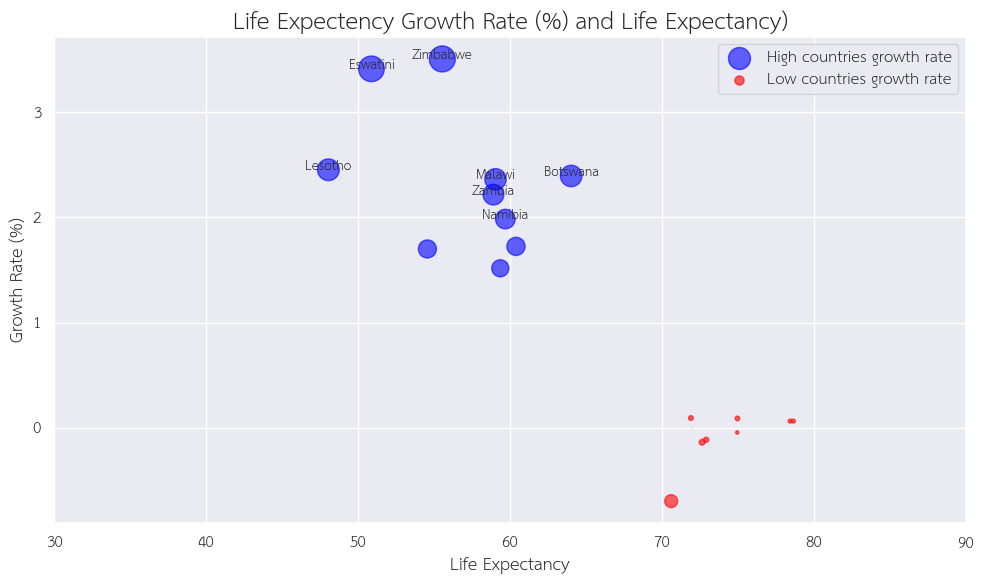

In [82]:
df35 = df_life[['Year', 'Life_expectancy', 'Country']]
df35 = df35[df35['Year'] > 2008]
df35 = df35.groupby(['Year', 'Country'])['Life_expectancy'].mean().reset_index()

# Sort by 'Country' and 'Year' to ensure proper calculation
df35 = df35.sort_values(by=['Country', 'Year'])

# Calculate the year-over-year growth for each country
df35['Growth'] = df35.groupby('Country')['Life_expectancy'].pct_change() * 100

# Drop rows with NaN values (first year for each country won't have growth data)
df35 = df35.dropna()
df35 = df35.groupby('Country', as_index=False)[['Life_expectancy', 'Growth']].mean()

# Sort by Growth and select top 10 and bottom 10 countries
top_10 = df35.sort_values(by='Growth', ascending=False).head(10)
bottom_10 = df35.sort_values(by='Growth', ascending=True).head(10)

# Plot the bubble chart
plt.figure(figsize=(10, 6))

# Plot top 10 countries with dynamic bubble sizes
plt.scatter(top_10['Life_expectancy'], top_10['Growth'],
            s=top_10['Growth'].abs() * 100, alpha=0.6, color='blue', label='High countries growth rate')


# Annotate country names for top 10
for i, row in top_10.head(7).iterrows():
    plt.text(row['Life_expectancy'], row['Growth'], row['Country'], fontsize=9, ha='center')

# Plot bottom 10 countries with dynamic bubble sizes
plt.scatter(bottom_10['Life_expectancy'], bottom_10['Growth'],
            s=bottom_10['Growth'].abs() * 125, alpha=0.6, color='red', label='Low countries growth rate')


# Annotate country names for bottom 10
'''for i, row in bottom_10.iterrows():
    plt.text(row['Life_expectancy'], row['Growth'], row['Country'], fontsize=9, ha='center')'''

# Add titles and labels
plt.title('Life Expectency Growth Rate (%) and Life Expectancy)', fontsize=16)
plt.xlabel('Life Expectancy', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.xticks(np.arange(30, 91, step=10))
# Add legend
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

In [83]:
df35.sort_values(by='Growth', ascending=False)

,Country,Life_expectancy,Growth
178,Zimbabwe,55.550000,3.505829
54,Eswatini,50.883333,3.411886
92,Lesotho,48.050000,2.452515
21,Botswana,64.033333,2.393571
98,Malawi,59.050000,2.362235
...,...,...,...
81,Jamaica,74.016667,0.000030
105,Mexico,74.966667,-0.044415
174,"Venezuela, RB",72.916667,-0.114281
65,Grenada,72.650000,-0.137458


**Part 2 thailand**


*   2.1 graph compare เกิด / ตาย  ใช้ sum
    *   2.1.1 all รวม male femal  x = แยกตามปี, y  = จำนวน
    *   2.1.2 ช
    *   2.1.3 ญ



In [71]:
df_birth_th = df_birth_th.rename(columns={'Male': 'birth_male', 'Female': 'birth_female', 'Total': 'birth_total'})

df_death_th = df_death_th.rename(columns={'Male': 'death_male', 'Female': 'death_female', 'Total': 'death_total'})

df_birth_death_th = pd.merge(df_birth_th, df_death_th, on=['year','Month'])

df_birth_death_th['birth_total'] = df_birth_death_th['birth_total'].astype(int)
df_birth_death_th['death_total'] = df_birth_death_th['death_total'].astype(int)

# Group by 'year' and sum the relevant columns
df_birth_death_th = df_birth_death_th.groupby('year', as_index=False)[
    ['birth_total', 'death_total', 'birth_male', 'birth_female', 'death_male', 'death_female']].sum()

df_birth_death_th['year'] = df_birth_death_th['year']-543


In [72]:
df_birth_death_th

,year,birth_total,death_total,birth_male,birth_female,death_male,death_female
0,2002,771787,322375,397158,374629,184538,137837
1,2003,778445,334725,400628,377817,192118,142607
2,2004,822593,363647,422764,399829,206890,156757
3,2005,809807,399331,416211,393596,227624,171707
4,2006,802924,392044,414049,388875,222960,169084
5,2007,811384,398438,417783,393601,224954,173484
6,2008,797356,401981,410737,386619,226714,175267
7,2009,787739,398133,405970,381769,225278,172855
8,2010,766370,414888,394341,372029,234917,179971
9,2011,796091,419265,410224,385867,237944,181321


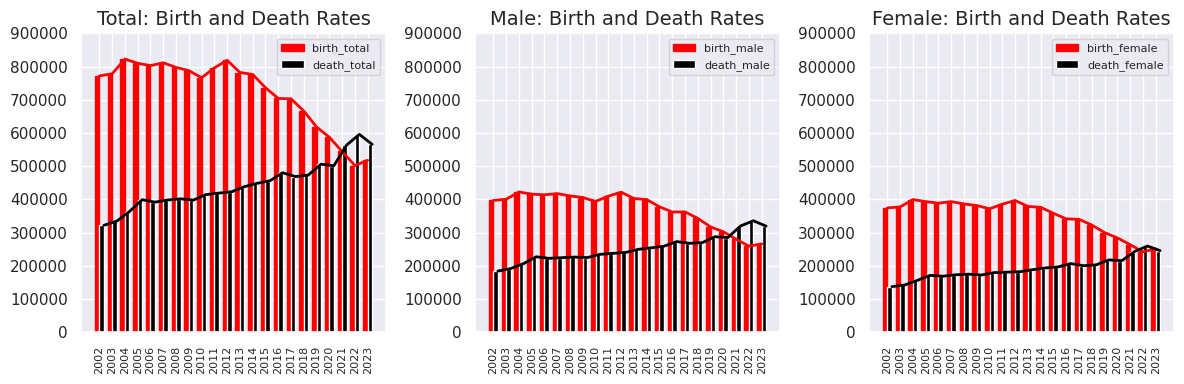

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

categories = [
    ('birth_total', 'death_total', 'Total: Birth and Death Rates'),
    ('birth_male', 'death_male', 'Male: Birth and Death Rates'),
    ('birth_female', 'death_female', 'Female: Birth and Death Rates')]

bar_width = 0.35
x = range(len(df_birth_death_th))

# Loop through the categories and plot each subplot
for i, (birth_col, death_col, title) in enumerate(categories):
    # Plot birth and death bars
    axes[i].bar(x, df_birth_death_th[birth_col], width=bar_width, color='red', edgecolor='red', label=f'{birth_col}')
    axes[i].bar([p + bar_width for p in x], df_birth_death_th[death_col], width=bar_width, color='black', label=f'{death_col}')

    # Add connecting lines between the tops of the bars
    axes[i].plot([p + bar_width / 2 for p in x], df_birth_death_th[birth_col], color='red', linewidth=2)
    axes[i].plot([p + 1.5 * bar_width for p in x], df_birth_death_th[death_col], color='black', linewidth=2)

    # Set title, ticks, and labels
    axes[i].set_title(title, fontsize=14)
    axes[i].set_xticks([p + bar_width / 2 for p in x])
    axes[i].set_xticklabels(df_birth_death_th['year'], rotation=90,fontsize =8)
    axes[i].legend(loc='upper right',fontsize=8)
    axes[i].set_yticks(np.arange(0, 900001, step=100000))

plt.tight_layout()
plt.show()



*   2.3 budget

    * 2.3.1 compare budget สาธา กับ all แยกรายปี / (amont)

In [74]:
df_budg_th_1 = df_budg_th[['ประเภท','จำนวนเงิน','ปี']]
df_budg_th_1 = df_budg_th_1[df_budg_th_1['ประเภท']!= 'GDP (CVM)']
df_budg_th_1= df_budg_th_1.groupby(['ปี','ประเภท']).sum().reset_index()
df_budg_th_1

,ปี,ประเภท,จำนวนเงิน
0,2016,การศึกษา,549708.07
1,2016,การสาธารณสุข,274231.17
2,2016,งบประมาณ,1104286.05
3,2016,สังคมสงเคราะห์,264293.08
4,2016,เศรษฐกิจ,583481.63
5,2017,การศึกษา,536732.05
6,2017,การสาธารณสุข,295582.63
7,2017,งบประมาณ,1177225.57
8,2017,สังคมสงเคราะห์,270599.79
9,2017,เศรษฐกิจ,642859.96


--2024-10-17 09:39:23--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2024-10-17 09:39:23--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.1’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.008s  

2024-10-17 09:39:23 (11.1 MB/s) - 

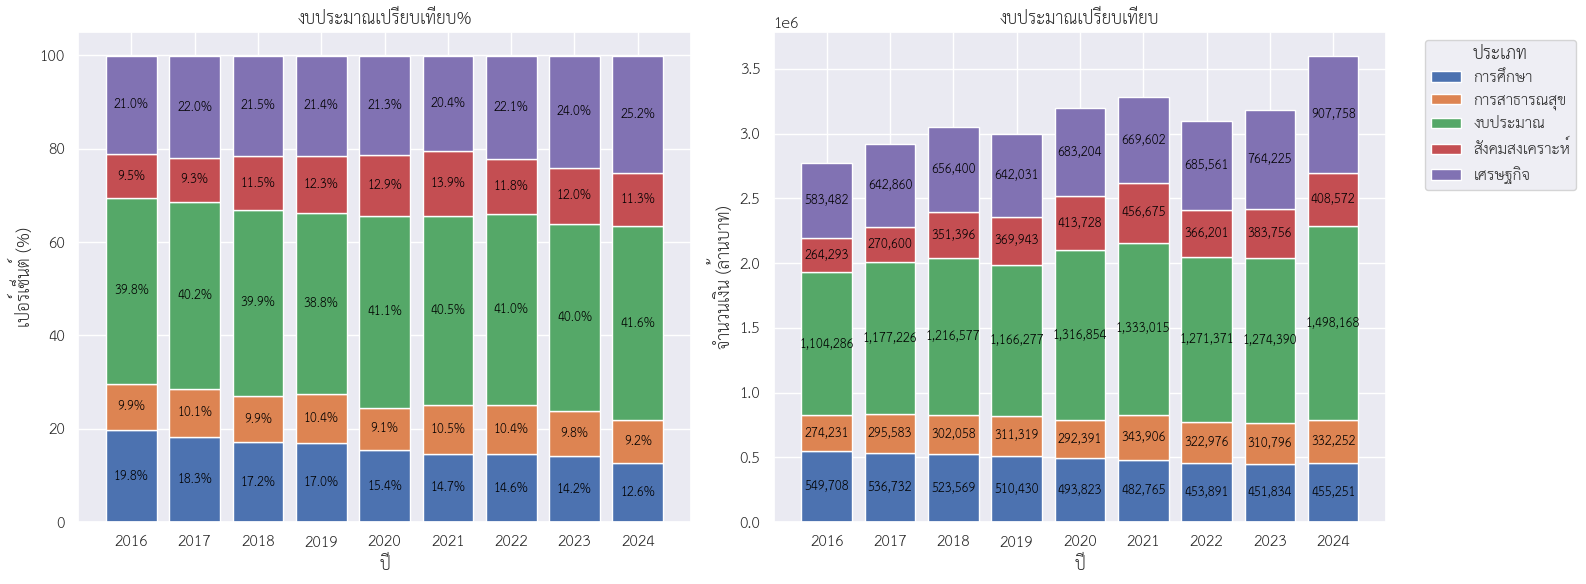

In [75]:
# Download the font and add to matplotlib font manager (ใช้ในกรณีที่สามารถดาวน์โหลดได้)
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

# เพิ่มฟอนต์ที่ดาวน์โหลดเข้ากับ Matplotlib
fm.fontManager.addfont('thsarabunnew-webfont.ttf')

# กำหนดฟอนต์ที่จะใช้เป็น 'TH Sarabun New'
plt.rcParams['font.family'] = 'TH Sarabun New'

# ตัวอย่างข้อมูล (คุณสามารถแทนที่ด้วยข้อมูลจริงของคุณ)
df_budg_th_1_pivot = df_budg_th_1.pivot(index='ปี', columns='ประเภท', values='จำนวนเงิน').reset_index()

# คำนวณสัดส่วนเป็นเปอร์เซ็นต์สำหรับกราฟซ้าย
df_budg_th_1_percent = df_budg_th_1_pivot.div(df_budg_th_1_pivot.sum(axis=1), axis=0) * 100

# Create subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot stacked bar chart (100%)
bottom = np.zeros(len(df_budg_th_1_percent))
#categories = df_budg_th_1_percent.columns
categories = df_budg_th_1_pivot.drop(columns=['ปี']).columns

for category in categories:
    bars = axes[0].bar(df_budg_th_1_percent.index, df_budg_th_1_percent[category], bottom=bottom, label=category)

    # Add values in the bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0:  # แสดงเฉพาะเมื่อมีค่า (ไม่แสดงหากเป็น 0)
            axes[0].text(
                bar.get_x() + bar.get_width() / 2,  # X position (middle of the bar)
                bottom[i] + height / 2,  # Y position (middle of the bar)
                f'{height:.1f}%',  # Format for percentage
                ha='center', va='center', fontsize=9, color='black')

    bottom += df_budg_th_1_percent[category]

# ตั้งค่าแกนและชื่อสำหรับกราฟซ้าย (แสดงเป็นเปอร์เซ็นต์)
axes[0].set_title('งบประมาณเปรียบเทียบ%')
axes[0].set_xlabel('ปี')
axes[0].set_ylabel('เปอร์เซ็นต์ (%)')
axes[0].set_xticks(np.arange(len(df_budg_th_1_pivot)))
axes[0].set_xticklabels(np.arange(2016, 2025))


# Plot stacked bar chart (จำนวนเงินจริง) on the right subplot
bottom = np.zeros(len(df_budg_th_1_pivot))
for category in categories:
    bars = axes[1].bar(df_budg_th_1_pivot.index, df_budg_th_1_pivot[category], bottom=bottom, label=category)

    # Add values in the bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0:  # แสดงเฉพาะเมื่อมีค่า (ไม่แสดงหากเป็น 0)
            axes[1].text(
                bar.get_x() + bar.get_width() / 2,  # X position (middle of the bar)
                bottom[i] + height / 2,  # Y position (middle of the bar)
                f'{height:,.0f}',  # Format for real amounts (with commas)
                ha='center', va='center', fontsize=9, color='black')

    bottom += df_budg_th_1_pivot[category]

# ตั้งค่าแกนและชื่อสำหรับกราฟขวา (แสดงจำนวนเงิน)
axes[1].set_title('งบประมาณเปรียบเทียบ')
axes[1].set_xlabel('ปี')
axes[1].set_ylabel('จำนวนเงิน (ล้านบาท)')
axes[1].set_xticks(np.arange(len(df_budg_th_1_pivot)))
axes[1].set_xticklabels(np.arange(2016, 2025))

axes[1].legend(title='ประเภท', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [76]:
categories

Index(['การศึกษา', 'การสาธารณสุข', 'งบประมาณ', 'สังคมสงเคราะห์', 'เศรษฐกิจ'], dtype='object', name='ประเภท')

In [77]:
df_budg_th_1_pivot

ประเภท,ปี,การศึกษา,การสาธารณสุข,งบประมาณ,สังคมสงเคราะห์,เศรษฐกิจ
0,2016,549708.07,274231.17,1104286.05,264293.08,583481.63
1,2017,536732.05,295582.63,1177225.57,270599.79,642859.96
2,2018,523569.43,302057.65,1216576.77,351395.93,656400.22
3,2019,510430.23,311319.37,1166276.97,369942.70,642030.73
4,2020,493822.72,292391.41,1316853.88,413727.63,683204.36
5,2021,482764.53,343906.20,1333015.05,456674.54,669601.68
6,2022,453891.24,322975.82,1271371.19,366201.07,685560.68
7,2023,451833.63,310795.79,1274389.69,383755.89,764225.00
8,2024,455250.51,332251.62,1498168.41,408571.58,907757.88


In [78]:
df_budg_th_2 = df_budg_th[['ประเภท','จำนวนเงิน','ปี']]
df_budg_th_2 = df_budg_th_2[df_budg_th_2['ปี']!= 2024]
df_budg_th_2 = df_budg_th_2[df_budg_th_2['ประเภท'].isin(['GDP (CVM)','งบประมาณ'])]
df_budg_th_2

,ประเภท,จำนวนเงิน,ปี
1,งบประมาณ,1274389.69,2023
2,งบประมาณ,1271371.19,2022
3,งบประมาณ,1333015.05,2021
4,งบประมาณ,1316853.88,2020
5,งบประมาณ,1166276.97,2019
6,งบประมาณ,1216576.77,2018
7,งบประมาณ,1177225.57,2017
8,งบประมาณ,1104286.05,2016
45,GDP (CVM),1.90,2023
46,GDP (CVM),2.50,2022


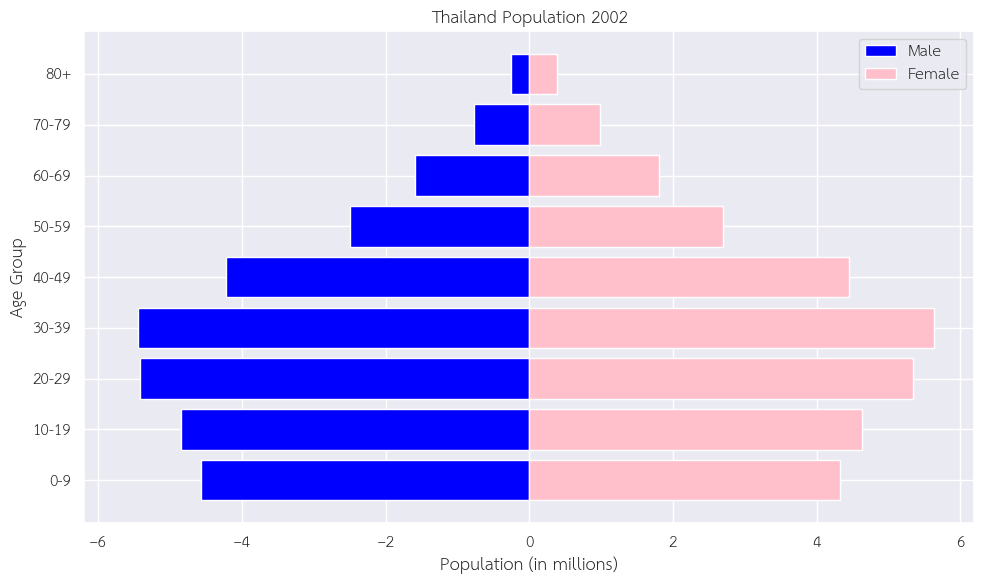

In [80]:
df_csv=df_pop_th
# Remove commas and convert columns to numeric
df_csv['Male'] = pd.to_numeric(df_csv['Male'].astype(str).str.replace(',', '', regex=False), errors='coerce')
df_csv['Female'] = pd.to_numeric(df_csv['Female'].astype(str).str.replace(',', '', regex=False), errors='coerce')

# Create a function to categorize the age groups into 10-year bins
def categorize_age(age):
    try:
        age = int(age)
    except:
        return '0-9'  # Assign ages like 'less 1' to the first bin
    if age < 10:
        return '0-9'
    elif age < 20:
        return '10-19'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    elif age < 70:
        return '60-69'
    elif age < 80:
        return '70-79'
    else:
        return '80+'

# Apply the categorization to the 'Age' column
df_csv['Age Group'] = df_csv['Age'].apply(categorize_age)

# Group by the new 'Age Group' and sum the Male and Female populations
df_grouped_csv = df_csv.groupby('Age Group').sum(numeric_only=True)

# Reverse the Male values to create the population pyramid
df_grouped_csv['Male'] = -df_grouped_csv['Male']

# Now let's plot the population pyramid with x-axis rescaled to millions
plt.figure(figsize=(10, 6))

# Plot male and female populations
plt.barh(df_grouped_csv.index, df_grouped_csv['Male'] / 1_000_000, color='blue', label='Male')
plt.barh(df_grouped_csv.index, df_grouped_csv['Female'] / 1_000_000, color='pink', label='Female')

# Adding labels and title
plt.xlabel('Population (in millions)')
plt.ylabel('Age Group')
plt.title('Thailand Population 2002')
plt.legend()

# Set equal scaling for both sides
plt.xlim([-max(abs(df_grouped_csv['Male'].min()), df_grouped_csv['Female'].max())/1_000_000*1.1,
           max(abs(df_grouped_csv['Male'].min()), df_grouped_csv['Female'].max())/1_000_000*1.1])

plt.tight_layout()
plt.show()


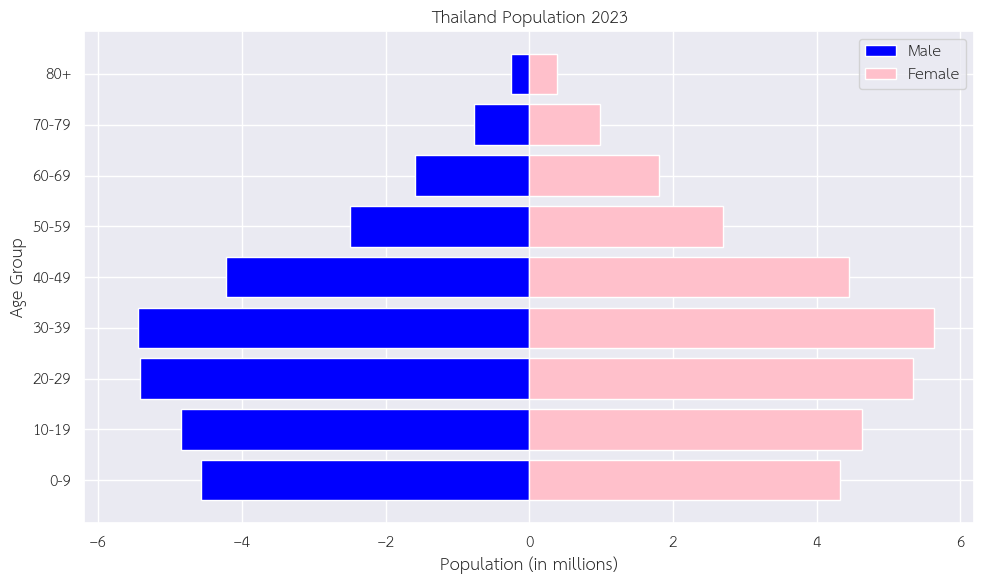

In [81]:
df_csv2=df_pop_th
# Remove commas and convert columns to numeric
df_csv2['Male'] = pd.to_numeric(df_csv['Male'].astype(str).str.replace(',', '', regex=False), errors='coerce')
df_csv2['Female'] = pd.to_numeric(df_csv['Female'].astype(str).str.replace(',', '', regex=False), errors='coerce')

# Create a function to categorize the age groups into 10-year bins
def categorize_age(age):
    try:
        age = int(age)
    except:
        return '0-9'  # Assign ages like 'less 1' to the first bin
    if age < 10:
        return '0-9'
    elif age < 20:
        return '10-19'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    elif age < 70:
        return '60-69'
    elif age < 80:
        return '70-79'
    else:
        return '80+'

# Apply the categorization to the 'Age' column
df_csv2['Age Group'] = df_csv2['Age'].apply(categorize_age)

# Group by the new 'Age Group' and sum the Male and Female populations
df_grouped_csv2 = df_csv2.groupby('Age Group').sum(numeric_only=True)

# Reverse the Male values to create the population pyramid
df_grouped_csv2['Male'] = -df_grouped_csv2['Male']

# Now let's plot the population pyramid with x-axis rescaled to millions
plt.figure(figsize=(10, 6))

# Plot male and female populations
plt.barh(df_grouped_csv2.index, df_grouped_csv2['Male'] / 1_000_000, color='blue', label='Male')
plt.barh(df_grouped_csv2.index, df_grouped_csv2['Female'] / 1_000_000, color='pink', label='Female')

# Adding labels and title
plt.xlabel('Population (in millions)')
plt.ylabel('Age Group')
plt.title('Thailand Population 2023')
plt.legend()

# Set equal scaling for both sides
plt.xlim([-max(abs(df_grouped_csv2['Male'].min()), df_grouped_csv2['Female'].max())/1_000_000*1.1,
           max(abs(df_grouped_csv2['Male'].min()), df_grouped_csv2['Female'].max())/1_000_000*1.1])

# Display the plot
plt.tight_layout()
plt.show()
